In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split


# Load Data:

In [2]:
df = pd.read_csv("churn.csv")
display(df)
display(df.columns)
display(df.describe().T)
display(df.isna().sum().T)
display(df.dtypes.T)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False.
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False.
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False.
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False.


Index(['State', 'Account Length', 'Area Code', 'Phone', 'Int'l Plan',
       'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge',
       'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls',
       'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge',
       'CustServ Calls', 'Churn?'],
      dtype='object')

,count,mean,std,min,25%,50%,75%,max
Account Length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area Code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
VMail Message,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Day Mins,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Day Calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Day Charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Eve Mins,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Eve Calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Eve Charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Night Mins,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [3]:
print(df["Churn?"].unique())
print(len(df[df["Churn?"] == "True."].index) / len(df.index))

['False.' 'True.']
0.14491449144914492


In [4]:
df["churn"] = (df["Churn?"] == "True.")
print(df["churn"].sum())

483


# Explore the Data

## Does the length of the account correlate with churn?

In [5]:
df.groupby("churn", as_index=False).agg({"Account Length": [np.mean, np.std]})

churn Account Length          
                   mean       std
0  False     100.793684  39.88235
1   True     102.664596  39.46782

## Is there an area code where people are more likely to churn?

In [6]:
display(df.groupby("Area Code", as_index=False).agg(
    {"churn": [np.sum, lambda x: x.size, lambda x: x.sum() / x.size]}))

Area Code churn                      
              sum <lambda_0> <lambda_1>
0       408   122        838   0.145585
1       415   236       1655   0.142598
2       510   125        840   0.148810

# Is there a dependence on charge or number of daily calls?

In [7]:
ag_df = df.groupby("churn", as_index=False).agg(
    {"Day Charge": [np.mean, np.std], "Day Calls": [np.mean, np.std], "Day Mins": np.mean,
     "Eve Charge": [np.mean, np.std], "Eve Calls": [np.mean, np.std], "Eve Mins": np.mean,
     "Night Charge": [np.mean, np.std], "Night Calls": [np.mean, np.std], "Night Mins": np.mean})
display(ag_df)

churn Day Charge              Day Calls               Day Mins Eve Charge  \
               mean        std        mean        std        mean       mean   
0  False  29.780421   8.530835  100.283158  19.801157  175.175754  16.918909   
1   True  35.175921  11.729710  101.335404  21.582307  206.914079  18.054969   

              Eve Calls               Eve Mins Night Charge            \
        std        mean        std        mean         mean       std   
0  4.274863  100.038596  19.958414  199.043298     9.006074  2.299768   
1  4.396762  100.561077  19.724711  212.410145     9.235528  2.121081   

  Night Calls             Night Mins  
         mean        std        mean  
0  100.058246  19.506246  200.133193  
1  100.399586  19.950659  205.231677

In [8]:
# display(ag_df[[('Day Charge', 'mean'), ('Day Charge', 'std')]])
display(ag_df.apply(lambda x: x[('Day Charge', 'mean')] / x[('Day Mins', 'mean')], axis=1))
display(ag_df.apply(lambda x: x[('Eve Charge', 'mean')] / x[('Eve Mins', 'mean')], axis=1))
display(ag_df.apply(lambda x: x[('Night Charge', 'mean')] / x[('Night Mins', 'mean')], axis=1))

0    0.170003
1    0.170003
dtype: float64

0    0.085001
1    0.085001
dtype: float64

0    0.045
1    0.045
dtype: float64

## Is there dependence on number of calls made to Customer Service?

In [9]:
df.groupby("churn", as_index=False).agg({"CustServ Calls": [np.mean, np.min, np.max, np.median]})

churn CustServ Calls                 
                   mean amin amax median
0  False       1.449825    0    8    1.0
1   True       2.229814    0    9    2.0

## Is there a dependence on number of Voice Mails or having VMail plan?

In [10]:
df.groupby("churn", as_index=False).agg({"VMail Plan": lambda x: np.sum(x == "yes") / x.size})

,churn,VMail Plan
0,False,0.295439
1,True,0.165631


In [11]:
df.groupby(["churn", "VMail Plan"], as_index=False).agg(
    {"VMail Message": [lambda x: x.size, np.mean, np.std]})

churn VMail Plan VMail Message                     
                       <lambda_0>       mean       std
0  False         no          2008   0.000000  0.000000
1  False        yes           842  29.124703  7.576789
2   True         no           403   0.000000  0.000000
3   True        yes            80  30.887500  7.219863

</br></br></br>

# Predict Churn

In [56]:
x_df = df[[
    # "State", 
    # "Account Length", 
    # "Area Code", 
    "Int'l Plan",
    "VMail Plan", 
    "VMail Message", 
    "Day Mins", 
    "Day Calls", 
    "Day Charge",
    "Eve Mins", 
    "Eve Calls", 
    "Eve Charge", 
    "Night Mins", 
    "Night Calls",
    "Night Charge", 
    "Intl Mins", 
    "Intl Calls", 
    "Intl Charge",
    "CustServ Calls"
]].copy()

## Transform to float64
# states_encoding_map = {
#     s: idx for idx, s in enumerate(x_df["State"].unique().tolist())}
# print(states_encoding_map)
#
# intl_plan_encoding_map = {
    # s: idx for idx, s in enumerate(x_df["Int'l Plan"].unique().tolist())}
# print(intl_plan_encoding_map)
# #
# vmail_encoding_map = {
    # s: idx for idx, s in enumerate(x_df["VMail Plan"].unique().tolist())}
# print(vmail_encoding_map)
binary_map = {"no": 0, "yes": 1}

# x_df.iloc[:, x_df.columns.get_loc("State")] = x_df["State"].map(states_encoding_map)
x_df.iloc[:, x_df.columns.get_loc("Int'l Plan")] = x_df["Int'l Plan"].map(binary_map)
x_df.iloc[:, x_df.columns.get_loc("VMail Plan")] = x_df["VMail Plan"].map(binary_map)
# display(x_df)

display(x_df.dtypes.T)
x = x_df.to_numpy().astype(np.float64)
print(x.shape, x.dtype)

y = df["churn"].to_numpy().astype(np.int64)
print(y.shape, y.dtype)

feature_names_dict = {x_df.columns.get_loc(c): c for c in x_df.columns}
print(feature_names_dict)

/var/folders/jd/xzt2qvgj0h3525l8xwj_wgwh0000gn/T/ipykernel_7529/4153582863.py:38: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_df.iloc[:, x_df.columns.get_loc("Int'l Plan")] = x_df["Int'l Plan"].map(binary_map)
/var/folders/jd/xzt2qvgj0h3525l8xwj_wgwh0000gn/T/ipykernel_7529/4153582863.py:39: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_df.iloc[:, x_df.columns.get_loc("VMail Plan")] = x_df["VMail Plan"].map(binary_map)


Int'l Plan          int64
VMail Plan          int64
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
dtype: object

(3333, 16) float64
(3333,) int64
{0: "Int'l Plan", 1: 'VMail Plan', 2: 'VMail Message', 3: 'Day Mins', 4: 'Day Calls', 5: 'Day Charge', 6: 'Eve Mins', 7: 'Eve Calls', 8: 'Eve Charge', 9: 'Night Mins', 10: 'Night Calls', 11: 'Night Charge', 12: 'Intl Mins', 13: 'Intl Calls', 14: 'Intl Charge', 15: 'CustServ Calls'}


In [57]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)

print(y_train.shape, y_train.sum())
print(y_test.shape, y_test.sum())

(2666,) 386
(667,) 97


## Random Forest:

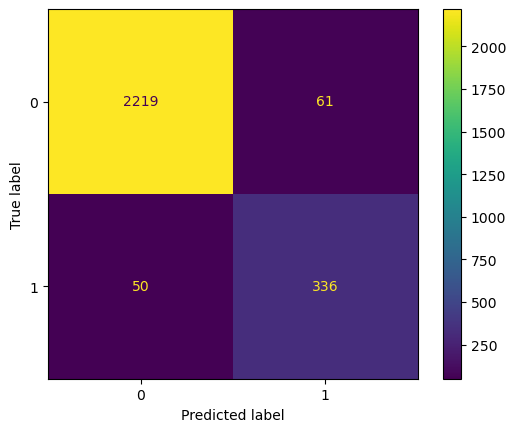

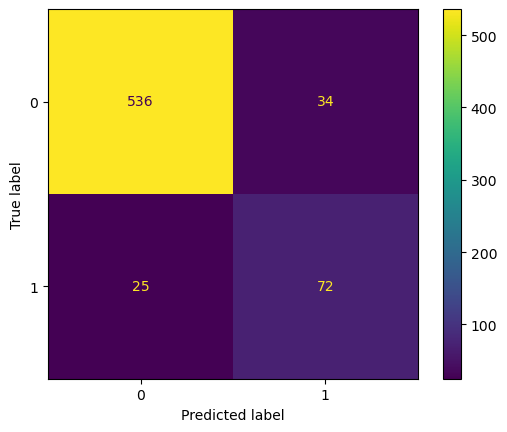

In [58]:
clf = RandomForestClassifier(
    n_estimators=100, 
    # max_depth=3, 
    min_samples_leaf=10,
    class_weight={0:1, 1:5})
clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

train_cfmat = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(train_cfmat)
disp.plot()
test_cfmat = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(test_cfmat)
disp.plot()

In [59]:
importances = clf.feature_importances_

print("Feature Importance:")
for idx, imp in enumerate(importances):
    print(f"\t{feature_names_dict[idx]:<16} {str(round(imp, 4)):<6}")

Feature Importance:
	Int'l Plan       0.111 
	VMail Plan       0.0189
	VMail Message    0.0315
	Day Mins         0.1452
	Day Calls        0.0215
	Day Charge       0.1674
	Eve Mins         0.0527
	Eve Calls        0.0207
	Eve Charge       0.0486
	Night Mins       0.0274
	Night Calls      0.0217
	Night Charge     0.024 
	Intl Mins        0.0299
	Intl Calls       0.0337
	Intl Charge      0.0313
	CustServ Calls   0.2146


## Grid Search:

In [60]:
rand_forest_gs_params = {
    "n_estimators": [200], 
    # "criterion": ["gini"], 
    "max_depth": [3, 5], 
    "min_samples_split": [3, 6], 
    # "min_samples_leaf": [1], 
    # "min_weight_fraction_leaf": [0.0], 
    "max_features": ["sqrt", 5, 7], 
    # "max_leaf_nodes": [None], 
    # "min_impurity_decrease": [0.0], 
    # "bootstrap": [True], 
    # "oob_score": [False], 
    # "n_jobs": [None], 
    # "random_state": [None], 
    # "verbose": [0], 
    # "warm_start": [False], 
    "class_weight": ["balanced", {0:1, 1:2}, {0:1, 1:4}, {0:1, 1:6}, {0:1, 1:8}], 
    # "ccp_alpha": [0.0], 
    # "max_samples": [None]
}

scores = ["recall", "accuracy", "precision", "balanced_accuracy"]

def refit_func():
    pass

grid_search = GridSearchCV(
    RandomForestClassifier(), 
    rand_forest_gs_params,
    scoring=scores,
    refit=False,
    cv=5,
    n_jobs=-1)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', {0: 1, 1: 2},
                                          {0: 1, 1: 4}, {0: 1, 1: 6},
                                          {0: 1, 1: 8}],
                         'max_depth': [3, 5], 'max_features': ['sqrt', 5, 7],
                         'min_samples_split': [3, 6], 'n_estimators': [200]},
             refit=False,
             scoring=['recall', 'accuracy', 'precision', 'balanced_accuracy'])

In [61]:
# for key, value in grid_search.cv_results_.items():
#     print(f"\t{key}\t{value}")

params = grid_search.cv_results_["params"]
#
max_idx = grid_search.cv_results_["mean_test_recall"].argmax()
print("Recall:            ", 
      np.around(grid_search.cv_results_["mean_test_recall"][max_idx], 4), "±",
      np.around(grid_search.cv_results_["std_test_recall"][max_idx], 4)
)
# grid_search.cv_results_["rank_test_recall"]
#
max_idx = grid_search.cv_results_["mean_test_accuracy"].argmax()
print("Accuracy:          ", 
      np.around(grid_search.cv_results_["mean_test_accuracy"][max_idx], 4), "±",
      np.around(grid_search.cv_results_["std_test_accuracy"][max_idx], 4)
)
# grid_search.cv_results_["rank_test_recall"]
#
max_idx = grid_search.cv_results_["mean_test_precision"].argmax()
print("Precision:         ", 
      np.around(grid_search.cv_results_["mean_test_precision"][max_idx], 4), "±",
      np.around(grid_search.cv_results_["std_test_recall"][max_idx], 4)
)
# grid_search.cv_results_["rank_test_precision"]
#
max_idx = grid_search.cv_results_["mean_test_balanced_accuracy"].argmax()
print("Balanced Accuracy: ", 
      np.around(grid_search.cv_results_["mean_test_balanced_accuracy"][max_idx], 4), "±",
      np.around(grid_search.cv_results_["std_test_balanced_accuracy"][max_idx], 4)
)
# grid_search.cv_results_["rank_test_balanced_accuracy"]

Recall:             0.8552 ± 0.0599
Accuracy:           0.9516 ± 0.0081
Precision:          0.8948 ± 0.0487
Balanced Accuracy:  0.8916 ± 0.0247


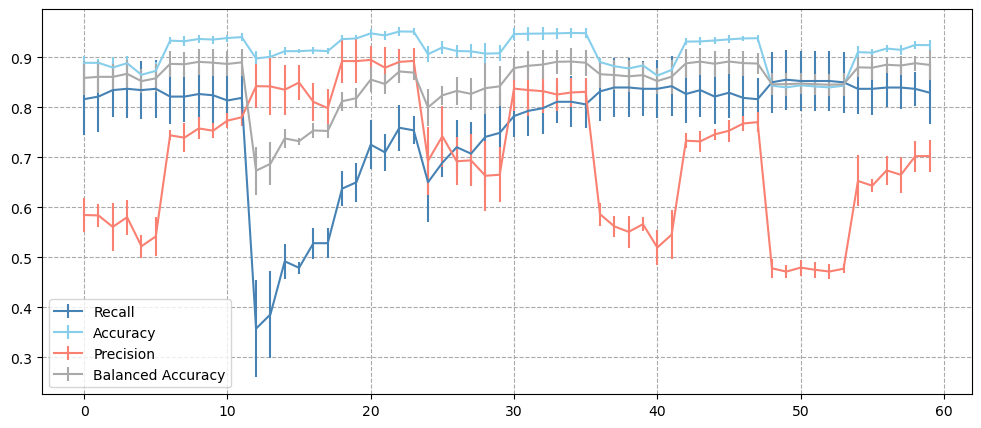

In [62]:
fig = plt.figure(figsize=(12., 5.0))
ax = fig.gca()

n = grid_search.cv_results_["mean_test_recall"].size
ax.errorbar(np.arange(n), y=grid_search.cv_results_["mean_test_recall"], 
            yerr=grid_search.cv_results_["std_test_recall"], c="steelblue", label="Recall")
ax.errorbar(np.arange(n), y=grid_search.cv_results_["mean_test_accuracy"], 
            yerr=grid_search.cv_results_["std_test_accuracy"], c="skyblue", label="Accuracy")
ax.errorbar(np.arange(n), y=grid_search.cv_results_["mean_test_precision"], 
            yerr=grid_search.cv_results_["std_test_precision"], c="salmon", label="Precision")
ax.errorbar(np.arange(n), y=grid_search.cv_results_["mean_test_balanced_accuracy"], 
            yerr=grid_search.cv_results_["std_test_balanced_accuracy"], c="darkgrey", label="Balanced Accuracy")
ax.grid(ls="--", color="darkgrey")
ax.set_axisbelow(True)
ax.legend()

plt.show()

In [63]:
# Best parameters:
criterion = "precision"  # "balanced_accuracy"
max_idx = grid_search.cv_results_[f"mean_test_{criterion}"].argmax()

print("Recall:            ", 
      np.around(grid_search.cv_results_["mean_test_recall"][max_idx], 4), "±",
      np.around(grid_search.cv_results_["std_test_recall"][max_idx], 4))
print("Balanced Accuracy: ", 
      np.around(grid_search.cv_results_["mean_test_balanced_accuracy"][max_idx], 4), "±",
      np.around(grid_search.cv_results_["std_test_balanced_accuracy"][max_idx], 4))
print("Accuracy:          ", 
      np.around(grid_search.cv_results_["mean_test_accuracy"][max_idx], 4), "±",
      np.around(grid_search.cv_results_["std_test_accuracy"][max_idx], 4))
print("Precision:         ", 
      np.around(grid_search.cv_results_["mean_test_precision"][max_idx], 4), "±",
      np.around(grid_search.cv_results_["std_test_precision"][max_idx], 4))

best_params = params[grid_search.cv_results_[f"rank_test_{criterion}"][max_idx]]
print(f"\nBest \"{criterion}\" Parameters:\n{best_params}")

Recall:             0.7254 ± 0.0487
Balanced Accuracy:  0.8555 ± 0.0249
Accuracy:           0.9479 ± 0.0086
Precision:          0.8948 ± 0.0268

Best "precision" Parameters:
{'class_weight': 'balanced', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 6, 'n_estimators': 200}


### Classifier w/ Best Set of Parameters for Recall: 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      2280
           1       0.59      0.85      0.69       386

    accuracy                           0.89      2666
   macro avg       0.78      0.87      0.81      2666
weighted avg       0.92      0.89      0.90      2666

              precision    recall  f1-score   support

           0       0.95      0.88      0.92       570
           1       0.51      0.75      0.61        97

    accuracy                           0.86       667
   macro avg       0.73      0.82      0.76       667
weighted avg       0.89      0.86      0.87       667



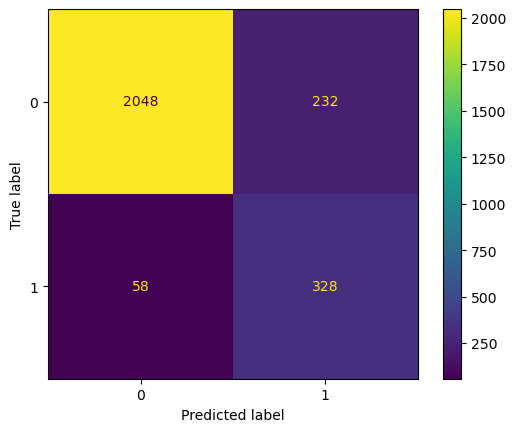

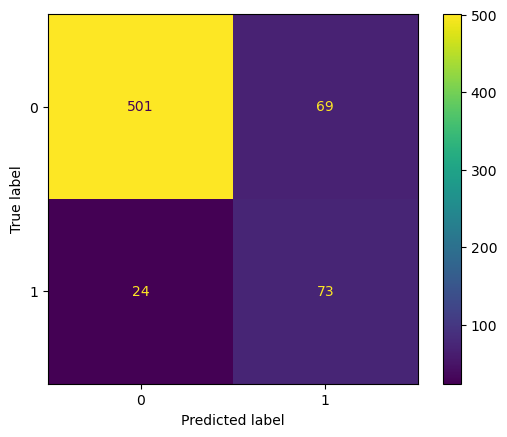

In [64]:
clf = RandomForestClassifier(**best_params)
clf.fit(x_train, y_train)

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))

train_cfmat = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(train_cfmat)
disp.plot()
test_cfmat = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(test_cfmat)
disp.plot()

In [65]:
importances = clf.feature_importances_

print("Feature Importance:")
for idx, imp in enumerate(importances):
    print(f"\t{feature_names_dict[idx]:<16} {str(round(imp, 4)):<6}")

Feature Importance:
	Int'l Plan       0.157 
	VMail Plan       0.0346
	VMail Message    0.0424
	Day Mins         0.2147
	Day Calls        0.0061
	Day Charge       0.2003
	Eve Mins         0.0289
	Eve Calls        0.0035
	Eve Charge       0.0298
	Night Mins       0.0088
	Night Calls      0.002 
	Night Charge     0.007 
	Intl Mins        0.0212
	Intl Calls       0.0208
	Intl Charge      0.0203
	CustServ Calls   0.2025
